# 🎓 Student Performance Modeling Summary

<div style="background-color:#1e1e2f; color:#f5f5f5; padding:15px; border-radius:8px;">

 1. Choosing the Target
- 🎯 **`Pass_Fail`** → classification (binary: pass/fail).  
- 📈 **`Final_Exam_Score`** → regression (predict actual score).  
We implemented **both approaches** for comparison.  

</div>

---

<div style="background-color:#2a2a3b; color:#f5f5f5; padding:15px; border-radius:8px;">

 2. Data Preparation
- No missing values ✅  
- **Features:** numerical (study hours, attendance, past scores) + categorical (gender, parental education, internet, extracurricular).  
- **Label Encoding** applied to categorical features.  
- Dataset split into **X (features)** and **y (target)**.  

</div>

---

<div style="background-color:#263238; color:#f5f5f5; padding:15px; border-radius:8px;">

 3. Classification Model (⚡ Pass/Fail)
- Algorithm: **RandomForestClassifier** 🌲  
- Evaluation Metrics:
  - ✔️ Accuracy  
  - ✔️ Confusion Matrix  
  - ✔️ Precision, Recall, F1-score  
- **Top Predictors:** Study Hours, Attendance, Past Exam Scores.  

</div>

---

<div style="background-color:#3a3a4f; color:#f5f5f5; padding:15px; border-radius:8px;">

 4. Regression Model (📊 Final Exam Score)
- Algorithm: **RandomForestRegressor** 🌲  
- Evaluation Metrics:
  - 📏 Mean Absolute Error (MAE)  
  - 📐 R² Score (variance explained)  
- **Top Predictors:** Study Hours, Attendance, Past Exam Scores.  

</div>

---

<div style="background-color:#212121; color:#f5f5f5; padding:15px; border-radius:8px;">

 5. Key Insights
- ⏱ More **study hours** → higher performance  
- 🏫 Higher **attendance** → better results (absence impacts grades strongly)  
- 📜 **Past scores** → reliable performance predictor  
- 👨‍👩‍👧 Parental education, internet access, extracurricular → weaker but still useful  

</div>

---

<div style="background-color:#1b2b34; color:#f5f5f5; padding:15px; border-radius:8px;">

 ✅ Conclusion
- **Pass/Fail model** → quick risk identification ⚠️  
- **Final Score model** → deeper predictions, needs tuning 🔧  
- Both confirm: **Study + Attendance = Success** 🎉  

</div>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

print('=======done=======')


/kaggle/input/student-performance-prediction/student_performance_dataset.csv
=======done=======


## Read Data 

In [2]:
# Load the dataset
data_path = '/kaggle/input/student-performance-prediction/student_performance_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataset
print('First few rows of the dataset:')
display(df.head())

# Display dataframe info
print('\nDataFrame Information:')
display(df.info())

First few rows of the dataset:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


None

In [3]:
# Drop the Student_ID column 
if 'Student_ID' in df.columns:
    df.drop('Student_ID', axis=1, inplace=True)
    print("Student id droped")


Student id droped


## check data for handling

In [4]:
#show missing value in data
print(f"Missing Value = {df.isnull().sum()}")

#show duplicated value
print(f'Duplicated = {df.duplicated().sum()}')

#the shape of data
print (f'Shape = {df.shape}')

Missing Value = Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64
Duplicated = 208
Shape = (708, 9)


In [5]:
#describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_per_Week,708.0,26.132768,8.877727,10.00000,19.000000,27.000000,34.000000,39.000000
Attendance_Rate,708.0,78.107722,13.802802,50.11697,67.550094,79.363046,89.504232,99.967675
Past_Exam_Scores,708.0,77.871469,14.402739,50.00000,65.000000,79.000000,91.000000,100.000000
Final_Exam_Score,708.0,58.771186,6.705877,50.00000,52.000000,59.500000,64.000000,77.000000


In [6]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Gender,0.0
Study_Hours_per_Week,0.0
Attendance_Rate,0.0
Past_Exam_Scores,0.0
Parental_Education_Level,0.0
Internet_Access_at_Home,0.0
Extracurricular_Activities,0.0
Final_Exam_Score,0.0
Pass_Fail,0.0


In [7]:
#show columns data name 
df.columns

Index(['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Parental_Education_Level', 'Internet_Access_at_Home',
       'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

## Show Duplicated in columns


In [8]:
# Count duplicates per column
duplicate_cols = []
for col in df.columns:
    if df[col].duplicated().sum() > 0:
        duplicate_cols.append(col)

print("Columns with duplicated values:", duplicate_cols)

Columns with duplicated values: ['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail']


In [9]:
dup_counts = df.apply(lambda x: x.duplicated().sum())
dup_counts = dup_counts[dup_counts > 0]  # only keep columns with duplicates
print(dup_counts)

Gender                        706
Study_Hours_per_Week          678
Attendance_Rate               208
Past_Exam_Scores              657
Parental_Education_Level      704
Internet_Access_at_Home       706
Extracurricular_Activities    706
Final_Exam_Score              681
Pass_Fail                     706
dtype: int64


## comment 
# The data here is normal because it is normal for there to be people with the same results, the same academic qualification, or the same number of hours. 
# Finally, the duplicate cannot be deleted

## EDA

## show outlier in data

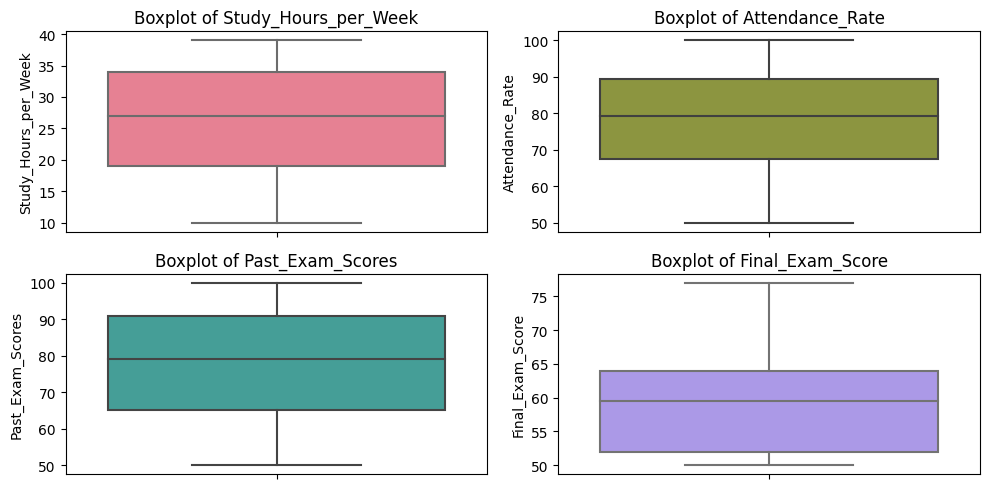

In [10]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns

# Define color palette
palette = sns.color_palette("husl", len(numerical))

#to show Outliers in data 
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Distribution for numerical columns

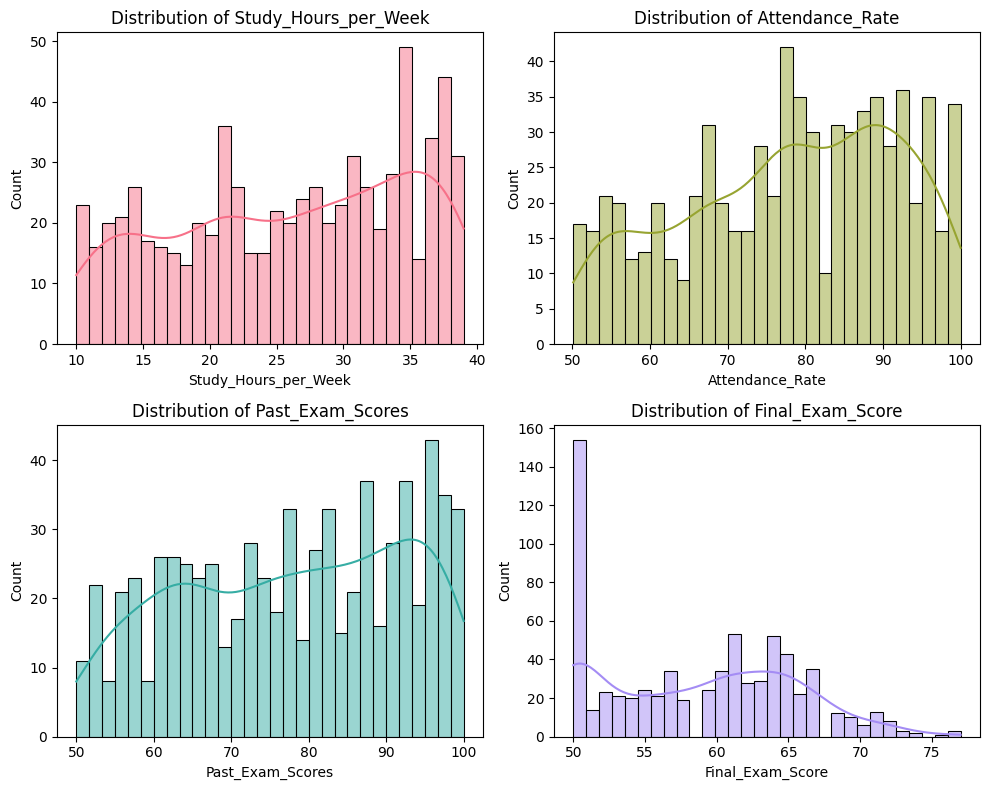

In [11]:
# Define color palette
palette = sns.color_palette("husl", len(numerical))

#to show Distribution
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## comment 
# The absence rate is high compared to the success rate, so the students’ success level is low due to their absence rate
# With the number of hours studied per day, the student becomes distracted because he studies a large number of hours without a clear result.

## deep analysis to explain more point

In [12]:
# Averages of each variable
print(df[['Study_Hours_per_Week', 'Attendance_Rate',
          'Past_Exam_Scores', 'Final_Exam_Score']].mean())

Study_Hours_per_Week    26.132768
Attendance_Rate         78.107722
Past_Exam_Scores        77.871469
Final_Exam_Score        58.771186
dtype: float64


## Check relationship: Study Hours vs Final Exam Score

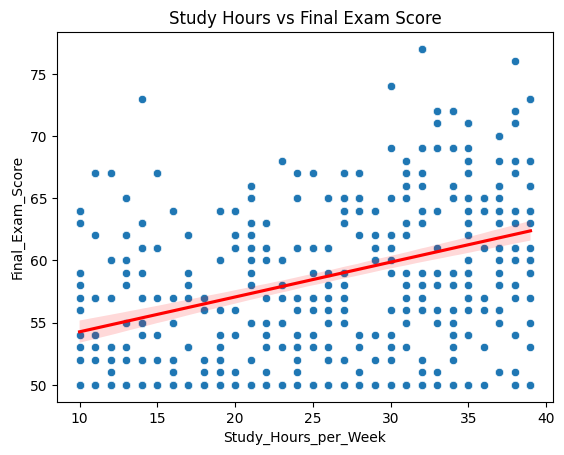

In [13]:
sns.scatterplot(x='Study_Hours_per_Week', y='Final_Exam_Score', data=df)
sns.regplot(x='Study_Hours_per_Week', y='Final_Exam_Score', data=df, scatter=False, color='red')
plt.title("Study Hours vs Final Exam Score")
plt.show()

## Check relationship: Attendance vs Final Exam Score

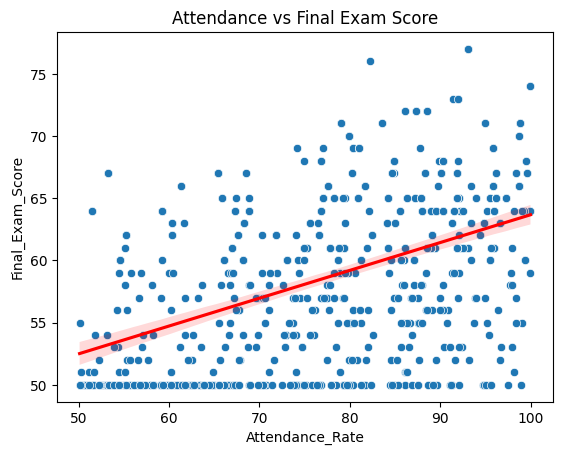

In [14]:
sns.scatterplot(x='Attendance_Rate', y='Final_Exam_Score', data=df)
sns.regplot(x='Attendance_Rate', y='Final_Exam_Score', data=df, scatter=False, color='red')
plt.title("Attendance vs Final Exam Score")
plt.show()


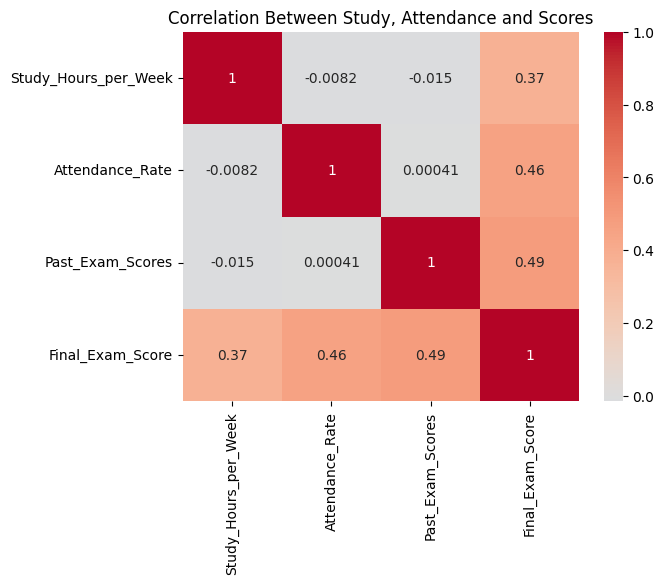

In [15]:
sns.heatmap(df[['Study_Hours_per_Week','Attendance_Rate',
                'Past_Exam_Scores','Final_Exam_Score']].corr(),
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Study, Attendance and Scores")
plt.show()


## show analysis for object columns

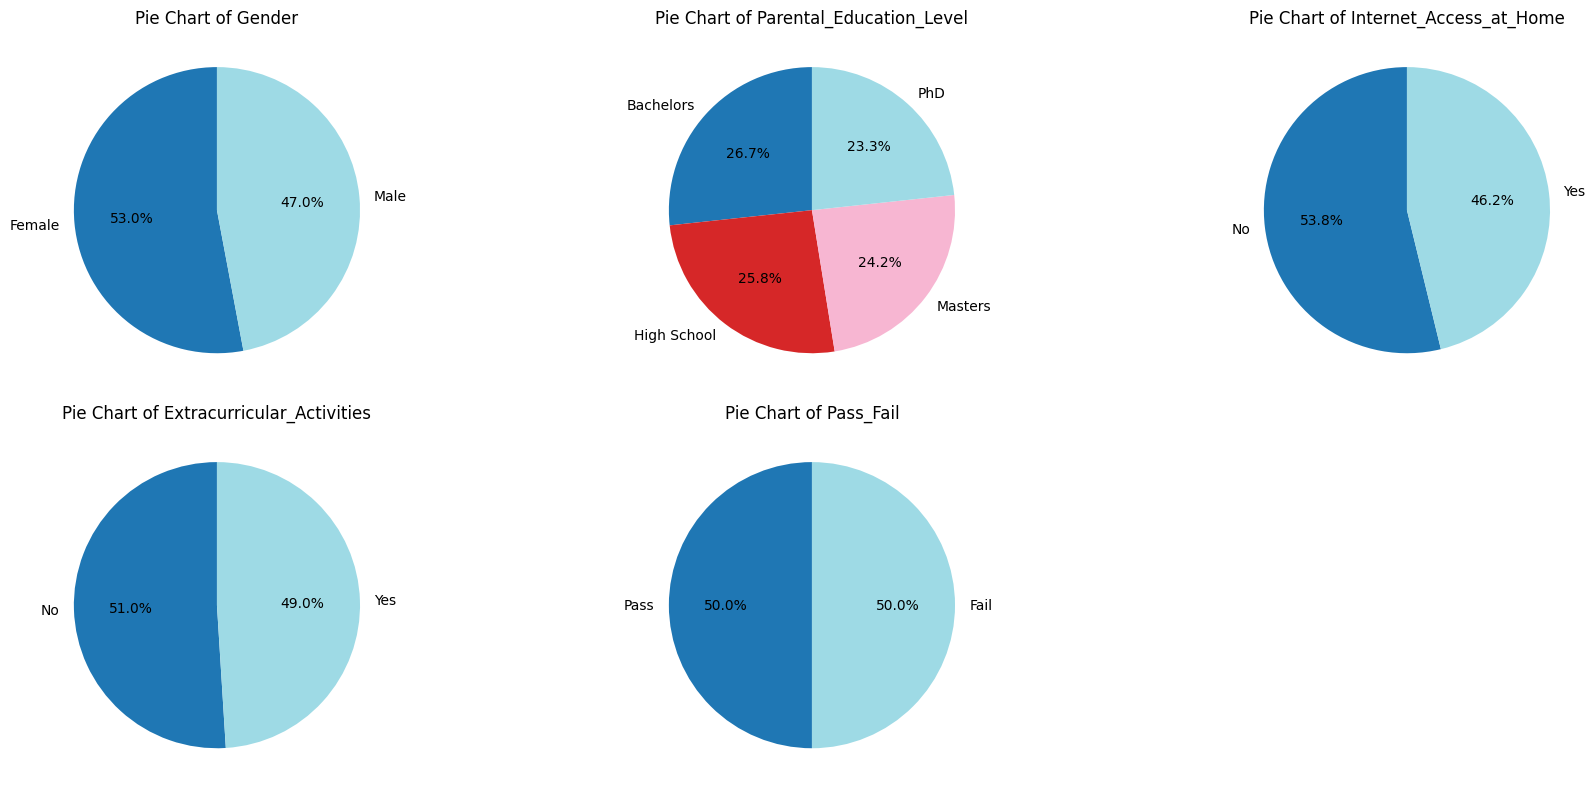

In [16]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

## frequancy table

In [17]:
for col in categorical_cols:
    print(f"\n---- {col} ----")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')



---- Gender ----
Gender
Female    52.97%
Male      47.03%
Name: proportion, dtype: object

---- Parental_Education_Level ----
Parental_Education_Level
Bachelors      26.69%
High School    25.85%
Masters        24.15%
PhD            23.31%
Name: proportion, dtype: object

---- Internet_Access_at_Home ----
Internet_Access_at_Home
No     53.81%
Yes    46.19%
Name: proportion, dtype: object

---- Extracurricular_Activities ----
Extracurricular_Activities
No     50.99%
Yes    49.01%
Name: proportion, dtype: object

---- Pass_Fail ----
Pass_Fail
Pass    50.0%
Fail    50.0%
Name: proportion, dtype: object


## anthor diagram for object analysis

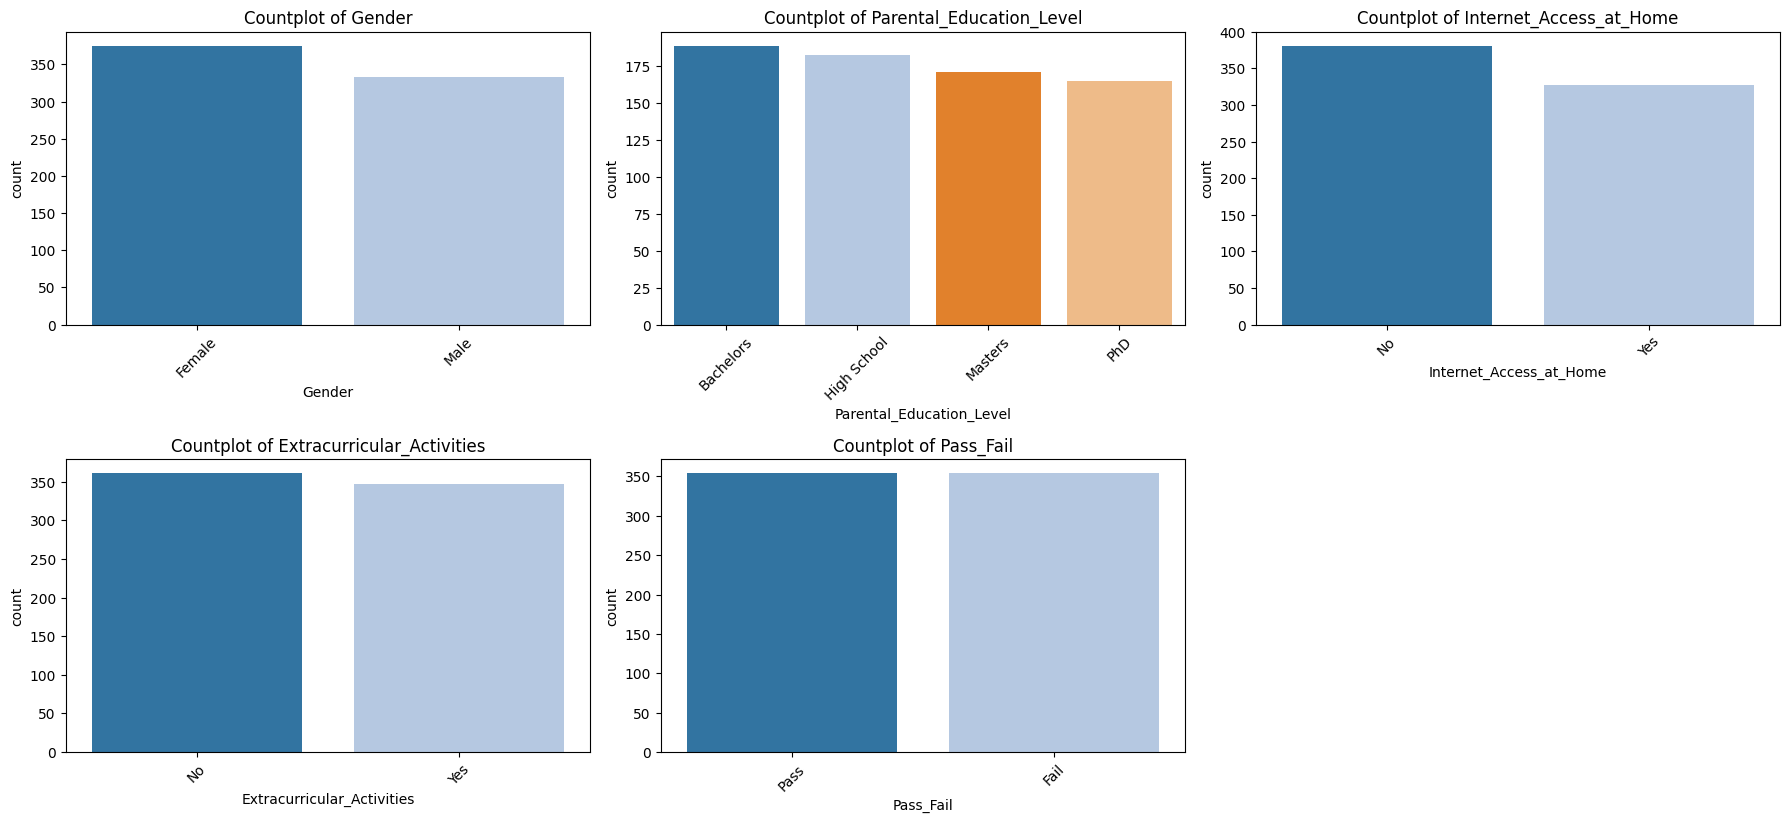

In [18]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette="tab20", order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## more advanced analysis 

## Relationship with numeric features

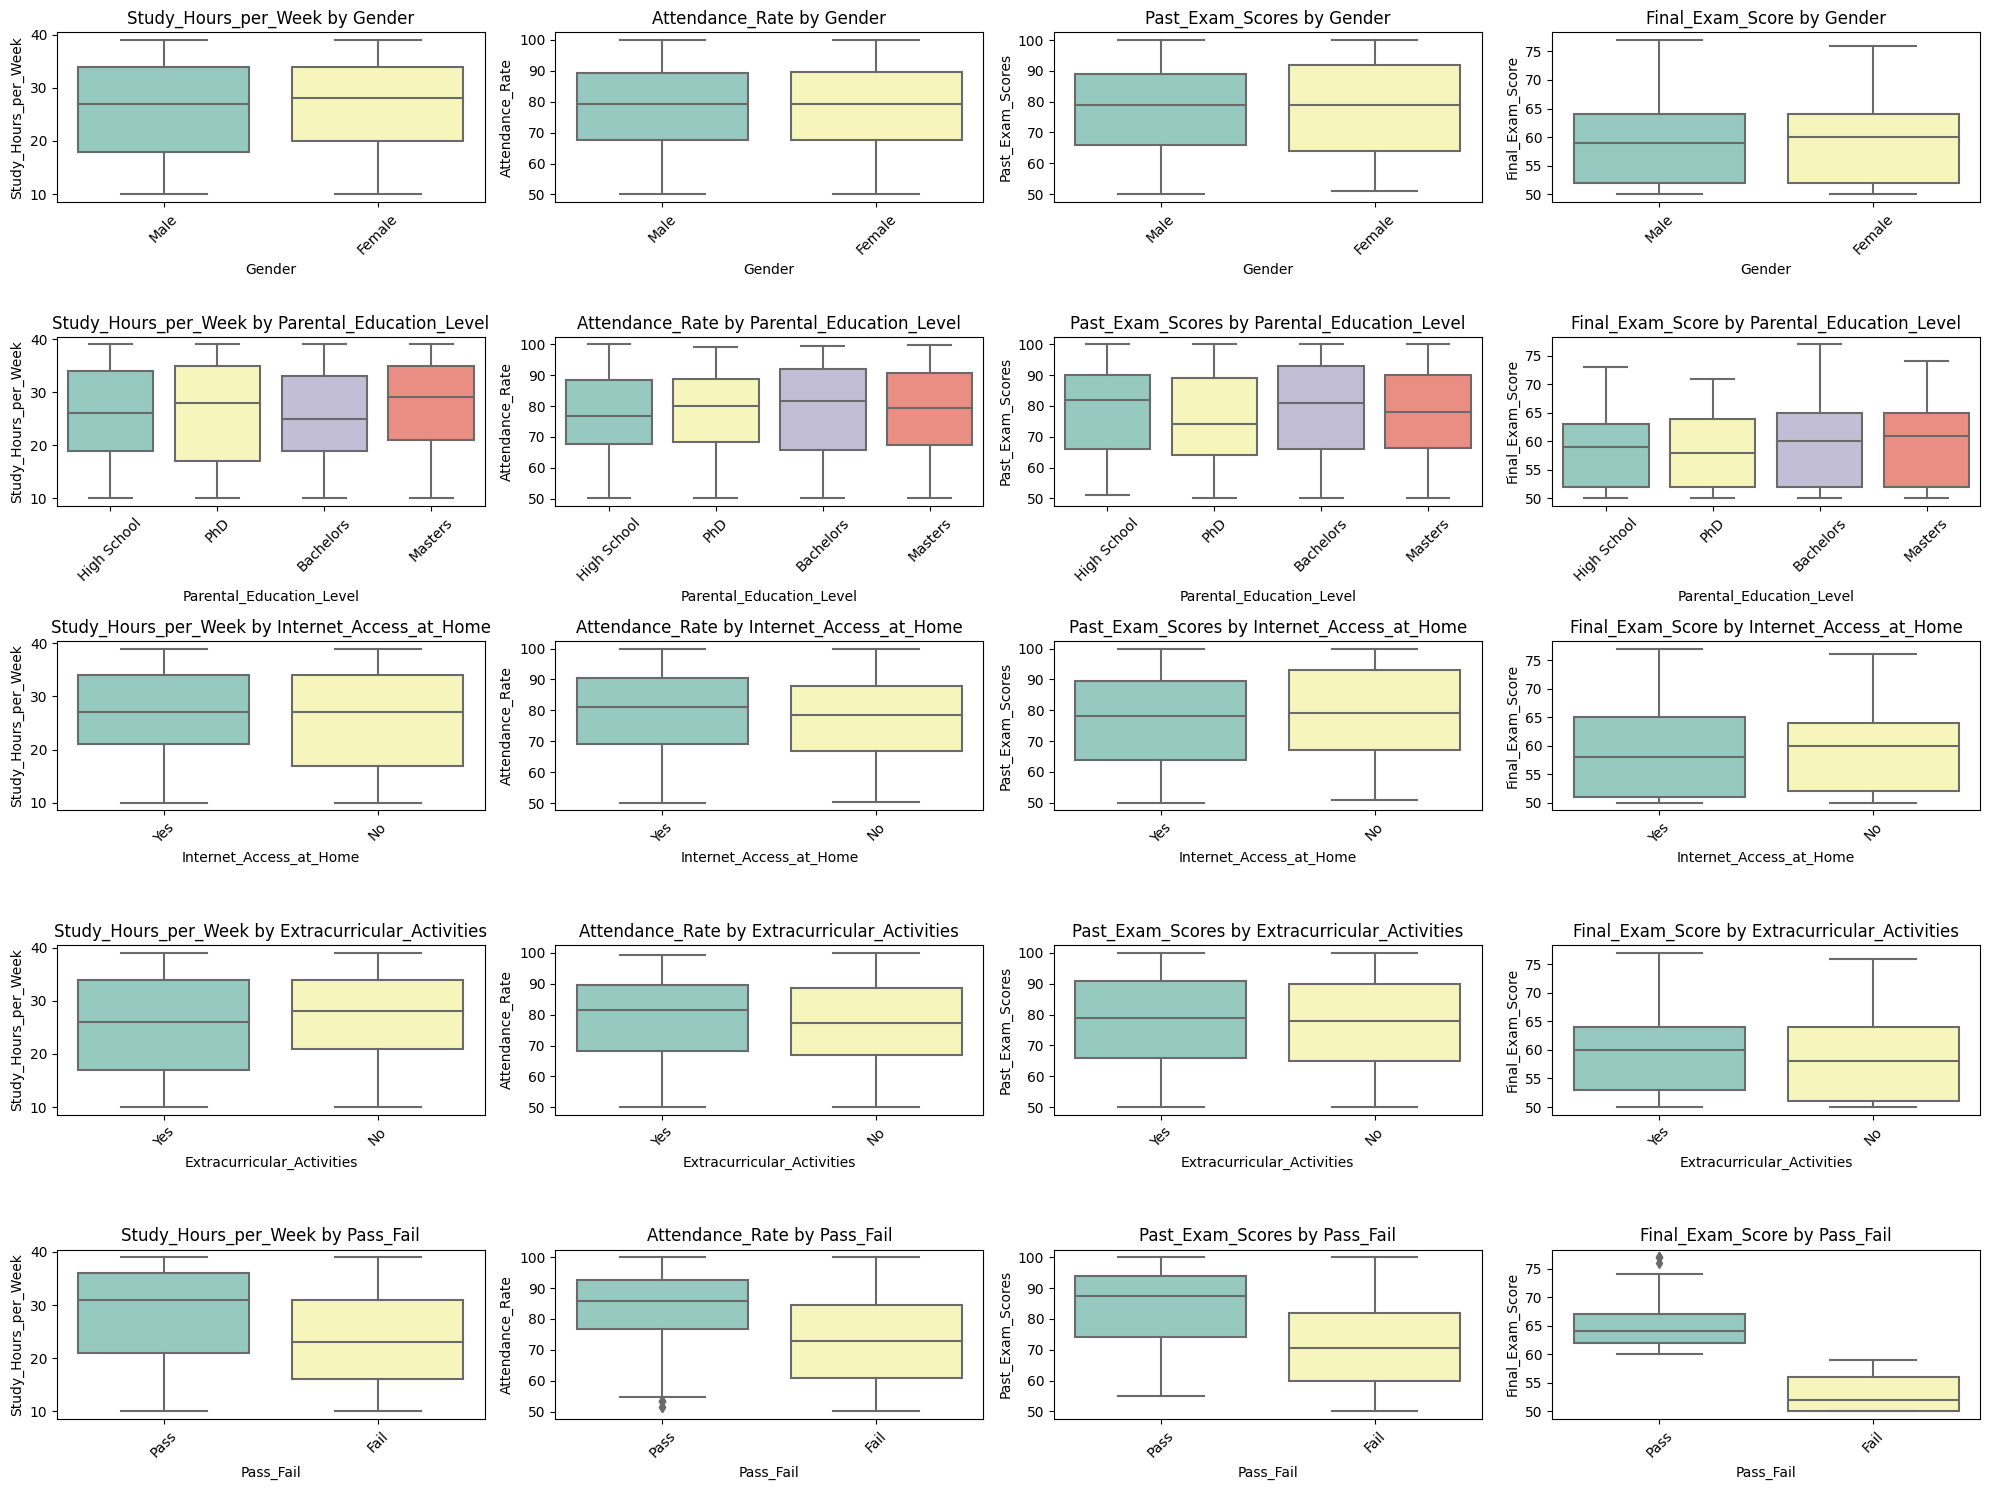

In [19]:
num_cols = ['Study_Hours_per_Week', 'Attendance_Rate',
            'Past_Exam_Scores', 'Final_Exam_Score']

plt.figure(figsize=(20, 15))
plot_no = 1
for col in categorical_cols:
    for num in num_cols:
        plt.subplot(len(categorical_cols), len(num_cols), plot_no)
        sns.boxplot(x=col, y=num, data=df, palette="Set3")
        plt.title(f'{num} by {col}')
        plt.xticks(rotation=45)
        plot_no += 1
plt.tight_layout()
plt.show()


In [20]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Apply on all categorical pairs
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            print(f"{col1} vs {col2} → Cramér’s V: {cramers_v(df[col1], df[col2]):.3f}")

Gender vs Parental_Education_Level → Cramér’s V: 0.052
Gender vs Internet_Access_at_Home → Cramér’s V: 0.000
Gender vs Extracurricular_Activities → Cramér’s V: 0.000
Gender vs Pass_Fail → Cramér’s V: 0.050
Parental_Education_Level vs Gender → Cramér’s V: 0.052
Parental_Education_Level vs Internet_Access_at_Home → Cramér’s V: 0.140
Parental_Education_Level vs Extracurricular_Activities → Cramér’s V: 0.000
Parental_Education_Level vs Pass_Fail → Cramér’s V: 0.036
Internet_Access_at_Home vs Gender → Cramér’s V: 0.000
Internet_Access_at_Home vs Parental_Education_Level → Cramér’s V: 0.140
Internet_Access_at_Home vs Extracurricular_Activities → Cramér’s V: 0.036
Internet_Access_at_Home vs Pass_Fail → Cramér’s V: 0.034
Extracurricular_Activities vs Gender → Cramér’s V: 0.000
Extracurricular_Activities vs Parental_Education_Level → Cramér’s V: 0.000
Extracurricular_Activities vs Internet_Access_at_Home → Cramér’s V: 0.036
Extracurricular_Activities vs Pass_Fail → Cramér’s V: 0.095
Pass_Fail v

In [21]:
for col in categorical_cols:
    avg_score = df.groupby(col)['Final_Exam_Score'].mean().sort_values(ascending=False)
    print(f"\nAverage Final Exam Score by {col}:\n", avg_score)



Average Final Exam Score by Gender:
 Gender
Female    58.978667
Male      58.537538
Name: Final_Exam_Score, dtype: float64

Average Final Exam Score by Parental_Education_Level:
 Parental_Education_Level
Masters        59.590643
Bachelors      59.126984
PhD            58.230303
High School    58.125683
Name: Final_Exam_Score, dtype: float64

Average Final Exam Score by Internet_Access_at_Home:
 Internet_Access_at_Home
No     58.853018
Yes    58.675841
Name: Final_Exam_Score, dtype: float64

Average Final Exam Score by Extracurricular_Activities:
 Extracurricular_Activities
Yes    59.233429
No     58.326870
Name: Final_Exam_Score, dtype: float64

Average Final Exam Score by Pass_Fail:
 Pass_Fail
Pass    64.562147
Fail    52.980226
Name: Final_Exam_Score, dtype: float64


## 🎯 Target Options

# Final_Exam_Score → regression (predict actual score out of 100).

# Pass_Fail → classification (predict whether student passes or fails).

In [22]:
# Features (drop target)
X = df.drop(columns=['Pass_Fail'])

# Encode categorical variables
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Target
y = df['Pass_Fail']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[71  0]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      1.00      1.00        71
        Pass       1.00      1.00      1.00        71

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



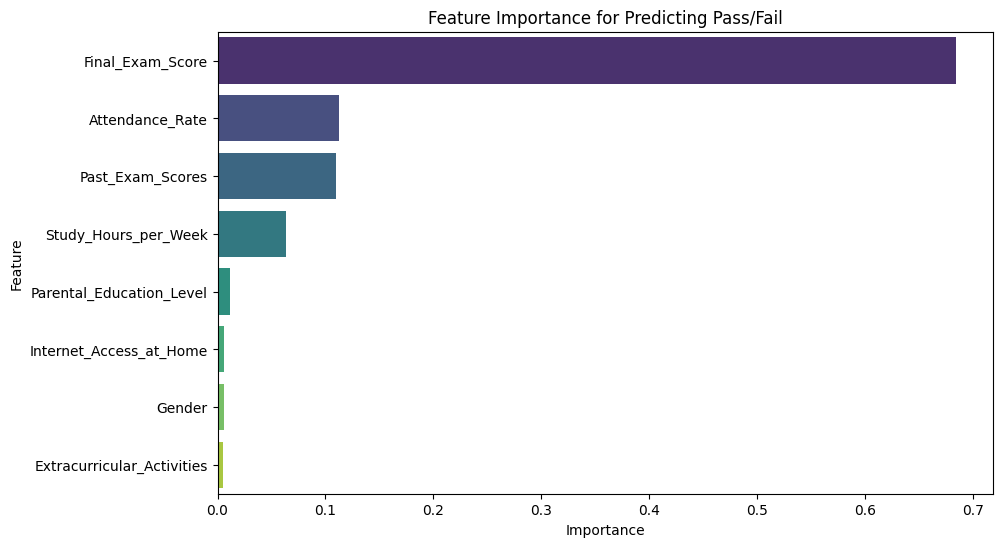

In [25]:
# Feature importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="viridis")
plt.title("Feature Importance for Predicting Pass/Fail")
plt.show()

In [26]:
X = df.drop(columns=['Final_Exam_Score'])
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
y = df['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.5195070422535208
R² Score: 0.8909650938304675


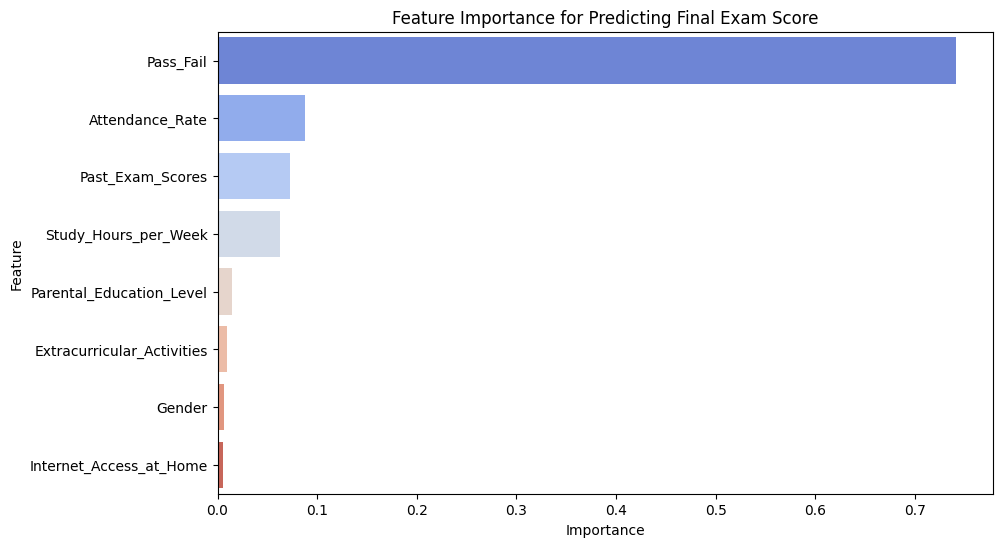

In [29]:
# Feature importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="coolwarm")
plt.title("Feature Importance for Predicting Final Exam Score")
plt.show()